# Data Labelling Resemblance Analysis (DLA) Dataset D

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for data labelling analisys
from data_labelling import mix_data
from data_labelling import split_data
from data_labelling import DataPreProcessor
from data_labelling import ClassificationModels

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/D_ContraceptiveMethod_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/D_ContraceptiveMethod_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/D_ContraceptiveMethod_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/D_ContraceptiveMethod_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/D_ContraceptiveMethod_Synthetic_WGANGP.csv'}
categorical_columns = ['wife_education','husband_education','wife_religion','wife_working','husband_occupation',
                        'standard_of_living_index','media_exposure','contraceptive_method_used']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':       wife_age wife_education husband_education  children wife_religion  \
 0           36              2                 4        11             1   
 1           48              1                 3         4             1   
 2           38              1                 2         8             1   
 3           27              2                 2         5             1   
 4           26              3                 2         4             1   
 ...        ...            ...               ...       ...           ...   
 1173        34              2                 4         6             1   
 1174        23              4                 4         1             1   
 1175        29              3                 4         3             1   
 1176        37              4                 4         5             0   
 1177        31              4                 4         2             1   
 
      wife_working husband_occupation standard_of_living_index media_exposure 

## 2. Mix real data with synthetic data

In [5]:
mixed_data = dict()
for name in SYNTHESIZERS :
    mixed_data[name] = mix_data(data['Real'], data[name])
mixed_data

{'GM':      wife_age wife_education husband_education  children wife_religion  \
 779        36              4                 4         3             1   
 908        40              4                 4         1             1   
 289        42              1                 3        12             1   
 253        42              4                 4         3             0   
 748        22              2                 2         2             1   
 ..        ...            ...               ...       ...           ...   
 545        47              1                 4         8             1   
 947        29              3                 3         3             1   
 576        39              2                 4         3             1   
 733        36              4                 4         3             1   
 262        30              3                 2         8             1   
 
     wife_working husband_occupation standard_of_living_index media_exposure  \
 779        

- 0 for real data
- 1 for synthetic data

## 2. Split train and test data

In [6]:
train_len = 0.8
train_data = dict()
test_data = dict()
for name in SYNTHESIZERS :
    print(name)
    train_data[name], test_data[name] = split_data(mixed_data[name], train_len)
    print(train_data[name].shape, test_data[name].shape)
    print('Train data', train_data[name].groupby('Label').size())
    print('Test data', test_data[name].groupby('Label').size())
    print('##############################################')

GM
(1884, 11) (471, 11)
Train data Label
0.0    956
1.0    928
dtype: int64
Test data Label
0.0    222
1.0    249
dtype: int64
##############################################
SDV
(1884, 11) (471, 11)
Train data Label
0.0    945
1.0    939
dtype: int64
Test data Label
0.0    232
1.0    239
dtype: int64
##############################################
CTGAN
(1884, 11) (471, 11)
Train data Label
0.0    931
1.0    953
dtype: int64
Test data Label
0.0    246
1.0    225
dtype: int64
##############################################
WGANGP
(1884, 11) (471, 11)
Train data Label
0.0    956
1.0    928
dtype: int64
Test data Label
0.0    222
1.0    249
dtype: int64
##############################################


## 3. Train Classifiers

In [7]:
categorical_columns = ['wife_education','husband_education','wife_religion','wife_working','husband_occupation',
                        'standard_of_living_index','media_exposure','contraceptive_method_used']
numerical_columns = ['wife_age','children']
categories = [np.array([0, 1, 2, 3]), np.array([0, 1, 2, 3]), np.array([0, 1]), np.array([0, 1]), 
              np.array([0, 1, 2, 3]), np.array([0, 1, 2, 3]), np.array([0, 1]), np.array([0, 1, 2, 3])]

#initialize classifiers
classifiers_all = dict()
data_preprocessors = dict()

target = 'Label'

for name in SYNTHESIZERS : 
    print(name)
    
    classifiers_all[name] = ClassificationModels()
    
    data_preprocessors[name] = DataPreProcessor(categorical_columns, numerical_columns, categories)
    x_train = data_preprocessors[name].preprocess_train_data(train_data[name].iloc[:, train_data[name].columns != target])
    y_train = train_data[name].loc[:, target]
    
    classifiers_all[name].train_classifiers(x_train, y_train)
    
    print('####################################################')

GM
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
SDV
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
CTGAN
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
WGANGP
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################


## 5. Evaluate Classifiers

In [8]:
results_all = dict()

for name in SYNTHESIZERS : 
    print(name)
    
    x_test = data_preprocessors[name].preprocess_test_data(test_data[name].loc[:, test_data[name].columns != target])
    print(x_test.shape)
    y_test = test_data[name].loc[:, target]
    
    classifiers_all[name].evaluate_classifiers(x_test, y_test)
    print('####################################################')

GM
(471, 28)
RF Tested
  model  accuracy  precision  recall      f1
0    RF    0.5732     0.6043  0.5582  0.5804
KNN Tested
  model  accuracy  precision  recall      f1
0   KNN    0.5584     0.6614  0.3373  0.4468
DT Tested
  model  accuracy  precision  recall      f1
0    DT    0.5711     0.5914  0.6104  0.6008
SVM Tested
  model  accuracy  precision  recall      f1
0   SVM    0.5456     0.5581  0.6747  0.6109
MLP Tested
  model  accuracy  precision  recall      f1
0   MLP    0.5796     0.6209  0.5261  0.5696
####################################################
SDV
(471, 28)
RF Tested
  model  accuracy  precision  recall      f1
0    RF    0.6879      0.713  0.6444  0.6769
KNN Tested
  model  accuracy  precision  recall      f1
0   KNN    0.6879     0.7212  0.6276  0.6711
DT Tested
  model  accuracy  precision  recall     f1
0    DT    0.6645     0.6849  0.6276  0.655
SVM Tested
  model  accuracy  precision  recall      f1
0   SVM    0.5605     0.5784  0.4937  0.5327
MLP Tested
  mode

## 6. Analyse models results

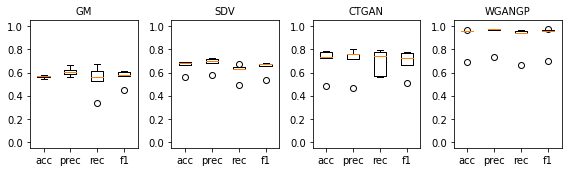

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(8, 2.5))
axs_idxs = [[0,0], [0,1], [1,0], [1,1]]
axs_idxs = [0, 1, 2, 3]
idx = dict(zip(SYNTHESIZERS,axs_idxs))

for name in SYNTHESIZERS :
    ax_plot = axs[idx[name]]
    classifiers_all[name].plot_classification_metrics(ax_plot)
    ax_plot.set_title(name, fontsize=10)

plt.tight_layout()
fig.savefig('DATA LABELLING RESULTS/CLASSIFICATION_METRICS.svg', bbox_inches='tight')